In [1]:
# Basic imports
import torch
import torch.nn as nn
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
print(os.listdir())

cuda
['data', 'models', 'work.ipynb']


In [2]:
# Hyperparameters
NUM_EPOCHS = 20
LEARNING_RATE = 1e-3
BATCH_SIZE = 64

In [3]:
# Helper function to show image
def show_image(dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size=6, shuffle=True)
    batch = next(iter(loader))
    images, labels = batch
    grid = torchvision.utils.make_grid(images, nrow=3)
    grid = (grid - grid.min()) / (grid.max() - grid.min())
    plt.figure(figsize=(11, 11))
    plt.imshow(grid.permute(1, 2, 0).numpy())
    plt.axis("off")
    plt.show()
    print(labels)

In [4]:
# Helper function to train model
def train_model(model, train_loader, val_loader, optimizer=None, criterion=None):
    if criterion is None:
        criterion = nn.CrossEntropyLoss()
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)
    n_total_steps = len(train_loader)
    epochs = []
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    for epoch in range(NUM_EPOCHS):
        train_loss = 0.
        val_loss = 0.
        model.train()
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            train_loss += loss.item() * labels.size(0)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if (i + 1) % 50 == 0:
                print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}")
        train_loss /= len(train_loader.dataset)
        epochs.append(epoch + 1)
        train_losses.append(train_loss)
        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * labels.size(0)
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        print(f"Epoch [{epoch + 1}/{NUM_EPOCHS}], Train loss {train_loss:.4f}, Val loss {val_loss:.4f}")
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save({
                'model_state_dict' : model.state_dict(),
                'optimizer_state_dict' : optimizer.state_dict()
            }, f"./models/Epoch{epoch+1}.pth")
            print("Saved best model")

    print("Finished training")
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Val Loss")
    plt.legend()
    plt.show()

In [5]:
"""
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tanlikesmath/the-oxfordiiit-pet-dataset")

print("Path to dataset files:", path)
"""

'\nimport kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("tanlikesmath/the-oxfordiiit-pet-dataset")\n\nprint("Path to dataset files:", path)\n'

In [5]:
os.getcwd()

'C:\\Users\\shubh\\Documents\\DL Lab\\24AI10013_Shubhajeet_10022026'

In [7]:
os.listdir('../../../.cache/kagglehub/datasets/tanlikesmath/the-oxfordiiit-pet-dataset/versions/1/images')

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg',
 'Abyssinian_108.jpg',
 'Abyssinian_109.jpg',
 'Abyssinian_11.jpg',
 'Abyssinian_110.jpg',
 'Abyssinian_111.jpg',
 'Abyssinian_112.jpg',
 'Abyssinian_113.jpg',
 'Abyssinian_114.jpg',
 'Abyssinian_115.jpg',
 'Abyssinian_116.jpg',
 'Abyssinian_117.jpg',
 'Abyssinian_118.jpg',
 'Abyssinian_119.jpg',
 'Abyssinian_12.jpg',
 'Abyssinian_120.jpg',
 'Abyssinian_121.jpg',
 'Abyssinian_122.jpg',
 'Abyssinian_123.jpg',
 'Abyssinian_124.jpg',
 'Abyssinian_125.jpg',
 'Abyssinian_126.jpg',
 'Abyssinian_127.jpg',
 'Abyssinian_128.jpg',
 'Abyssinian_129.jpg',
 'Abyssinian_13.jpg',
 'Abyssinian_130.jpg',
 'Abyssinian_131.jpg',
 'Abyssinian_132.jpg',
 'Abyssinian_133.jpg',
 'Abyssinian_134.jpg',
 'Abyssinian_135.jpg',
 'Abyssinian_136.jpg',
 'Abyssinian_137.jpg',
 'Abyssinian_138.

In [6]:
# Extracting datasets using custom control
from PIL import Image
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.file_list = os.listdir(root)
        class_names = sorted(set(['_'.join(fname.split('.')[0].lower().split('_')[:-1]) for fname in self.file_list]))
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(class_names)}
    def __len__(self):
        return len(self.file_list)
    def __getitem__(self, index):
        img_name = self.file_list[index]
        img = Image.open(os.path.join(self.root, img_name))
        if self.transform:
            img = self.transform(img)
        class_name = '_'.join(img_name.split('.')[0].lower().split('_')[:-1])
        label = self.class_to_idx[class_name]
        return img, label

In [7]:
root = '../../../.cache/kagglehub/datasets/tanlikesmath/the-oxfordiiit-pet-dataset/versions/1/images'

In [8]:
target_size = (224, 224)
calculation_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(target_size),
    torchvision.transforms.Grayscale(num_output_channels=3),
    torchvision.transforms.ToTensor()
])
temp_dataset = MyDataset(root = root, transform=calculation_transform)
class_to_idx = temp_dataset.class_to_idx
print(class_to_idx)
k = 1000
indices = random.sample(range(len(temp_dataset)), k=k)
processed_images = []

for i in indices:
    img, _ = temp_dataset[i]
    processed_images.append(img)

images = torch.stack(processed_images)
mean = images.mean(dim=[0, 2, 3])
std = images.std(dim=[0, 2, 3])
print(f"Mean: {mean}")
print(f"Std:  {std}")

{'abyssinian': 0, 'american_bulldog': 1, 'american_pit_bull_terrier': 2, 'basset_hound': 3, 'beagle': 4, 'bengal': 5, 'birman': 6, 'bombay': 7, 'boxer': 8, 'british_shorthair': 9, 'chihuahua': 10, 'egyptian_mau': 11, 'english_cocker_spaniel': 12, 'english_setter': 13, 'german_shorthaired': 14, 'great_pyrenees': 15, 'havanese': 16, 'japanese_chin': 17, 'keeshond': 18, 'leonberger': 19, 'maine_coon': 20, 'miniature_pinscher': 21, 'newfoundland': 22, 'persian': 23, 'pomeranian': 24, 'pug': 25, 'ragdoll': 26, 'russian_blue': 27, 'saint_bernard': 28, 'samoyed': 29, 'scottish_terrier': 30, 'shiba_inu': 31, 'siamese': 32, 'sphynx': 33, 'staffordshire_bull_terrier': 34, 'wheaten_terrier': 35, 'yorkshire_terrier': 36}
Mean: tensor([0.4504, 0.4504, 0.4504])
Std:  tensor([0.2556, 0.2556, 0.2556])


In [9]:
idx_to_class = {k: v for v, k in class_to_idx.items()}
print(idx_to_class)

{0: 'abyssinian', 1: 'american_bulldog', 2: 'american_pit_bull_terrier', 3: 'basset_hound', 4: 'beagle', 5: 'bengal', 6: 'birman', 7: 'bombay', 8: 'boxer', 9: 'british_shorthair', 10: 'chihuahua', 11: 'egyptian_mau', 12: 'english_cocker_spaniel', 13: 'english_setter', 14: 'german_shorthaired', 15: 'great_pyrenees', 16: 'havanese', 17: 'japanese_chin', 18: 'keeshond', 19: 'leonberger', 20: 'maine_coon', 21: 'miniature_pinscher', 22: 'newfoundland', 23: 'persian', 24: 'pomeranian', 25: 'pug', 26: 'ragdoll', 27: 'russian_blue', 28: 'saint_bernard', 29: 'samoyed', 30: 'scottish_terrier', 31: 'shiba_inu', 32: 'siamese', 33: 'sphynx', 34: 'staffordshire_bull_terrier', 35: 'wheaten_terrier', 36: 'yorkshire_terrier'}


grayscale conversion is reqd.

In [10]:
dataset = MyDataset(root = root)
mean = [0.4480, 0.4480, 0.4480]
std = [0.2526, 0.2526, 0.2526]
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])
train_tranform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(target_size),
    torchvision.transforms.Grayscale(num_output_channels=3),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(10),
    torchvision.transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])
test_tranform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(target_size),
    torchvision.transforms.Grayscale(num_output_channels=3),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])
train_dataset.dataset.transform = train_tranform
val_dataset.dataset.transform = test_tranform
test_dataset.dataset.transform = test_tranform
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
)
val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

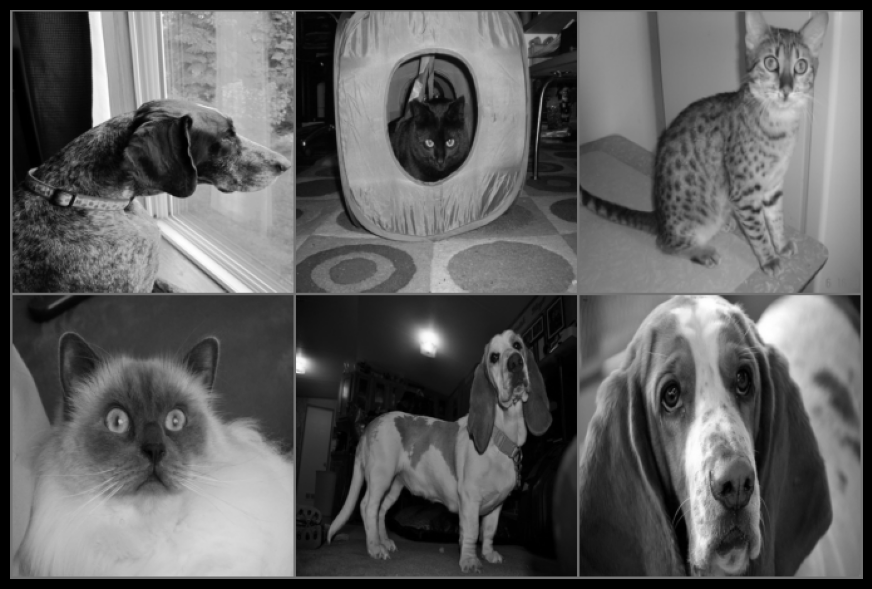

tensor([14,  7, 11,  6,  3,  3])


In [11]:
show_image(train_dataset)

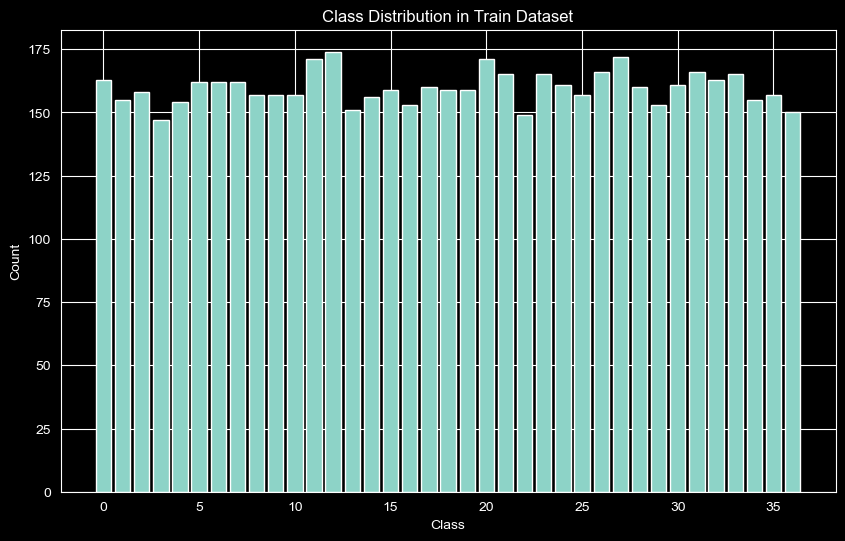

In [14]:
from collections import Counter
labels = [train_dataset.dataset[i][1] for i in train_dataset.indices]
label_counts = Counter(labels)
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Train Dataset")
plt.show()

In [15]:
print(label_counts)

Counter({12: 174, 27: 172, 11: 171, 20: 171, 26: 166, 31: 166, 21: 165, 23: 165, 33: 165, 32: 163, 0: 163, 7: 162, 6: 162, 5: 162, 30: 161, 24: 161, 28: 160, 17: 160, 18: 159, 19: 159, 15: 159, 2: 158, 9: 157, 35: 157, 25: 157, 8: 157, 10: 157, 14: 156, 1: 155, 34: 155, 4: 154, 16: 153, 29: 153, 13: 151, 36: 150, 22: 149, 3: 147})


In [16]:
print(len(label_counts))

37


In [15]:
def get_resnet18_custom(num_classes):
    model = torchvision.models.resnet18(weights='DEFAULT')
    # Extract features up to the GAP layer
    # ResNet-18 structure: [conv1, bn1, relu, maxpool, layer1, layer2, layer3, layer4, avgpool, fc]
    # We remove the original 'fc' layer
    backbone = nn.Sequential(*(list(model.children())[:-1]))

    # Define the 1x1 Convolutional Layer
    # ResNet-18's GAP output has 512 channels
    num_filters = 512

    custom_head = nn.Sequential(
        # Standard 1x1 conv: (in_channels, out_channels, kernel_size)
        nn.Conv2d(num_filters, num_classes, kernel_size=1),
        # Flatten the output from (Batch, Classes, 1, 1) to (Batch, Classes)
        nn.Flatten()
    )

    # Combine the backbone and the new head
    full_model = nn.Sequential(
        backbone,
        custom_head
    )

    return full_model

In [18]:
model = get_resnet18_custom(num_classes=37).to(device)
dummy_input = torch.randn(1, 3, 224, 224).to(device)
output = model(dummy_input)
print(f"Output shape: {output.shape}")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\shubh/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:07<00:00, 6.21MB/s]


Output shape: torch.Size([1, 37])


Epoch [1/20], Step [50/93], Loss: 2.6111
Epoch [1/20], Train loss 2.6888, Val loss 1.6035
Saved best model
Epoch [2/20], Step [50/93], Loss: 1.1142
Epoch [2/20], Train loss 1.1961, Val loss 0.9411
Saved best model
Epoch [3/20], Step [50/93], Loss: 0.8310
Epoch [3/20], Train loss 0.7470, Val loss 0.7205
Saved best model
Epoch [4/20], Step [50/93], Loss: 0.4528
Epoch [4/20], Train loss 0.5438, Val loss 0.6214
Saved best model
Epoch [5/20], Step [50/93], Loss: 0.3331
Epoch [5/20], Train loss 0.4235, Val loss 0.5645
Saved best model
Epoch [6/20], Step [50/93], Loss: 0.3108
Epoch [6/20], Train loss 0.3362, Val loss 0.5204
Saved best model
Epoch [7/20], Step [50/93], Loss: 0.2746
Epoch [7/20], Train loss 0.2662, Val loss 0.4877
Saved best model
Epoch [8/20], Step [50/93], Loss: 0.2148
Epoch [8/20], Train loss 0.2155, Val loss 0.4734
Saved best model
Epoch [9/20], Step [50/93], Loss: 0.1362
Epoch [9/20], Train loss 0.1762, Val loss 0.4552
Saved best model
Epoch [10/20], Step [50/93], Loss: 0.

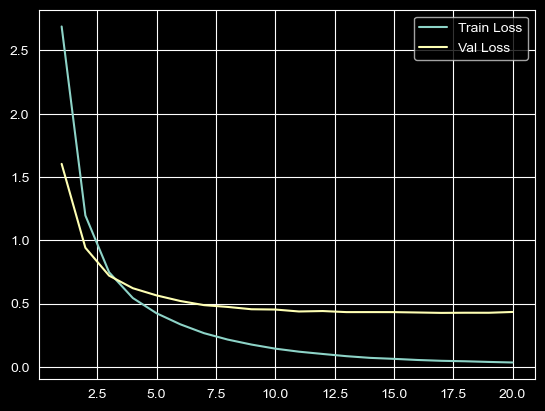

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, nesterov=True)
train_model(model, train_loader, val_loader, optimizer, criterion)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
def evaluate_model(model, test_loader, class_names, criterion=None):
    if criterion is None:
        criterion = nn.CrossEntropyLoss()
    model.eval()
    all_preds = []
    all_labels = []
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * labels.size(0)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_loss /= len(test_loader.dataset)
    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average="weighted")
    cm = confusion_matrix(all_labels, all_preds)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Overall Accuracy: {acc:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")
    class_acc = cm.diagonal() / cm.sum(axis=1)
    for i, class_name in enumerate(class_names):
        print(f"Accuracy for class {class_name}: {class_acc[i]:.4f}")
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
    return test_loss, acc, f1, cm, class_acc

In [ ]:
test_loss, acc, f1, cm, class_acc = evaluate_model(model, test_loader, range(35))


Epoch [1/20], Step [50/93], Loss: 2.5219
Epoch [1/20], Train loss 2.6976, Val loss 1.6488
Saved best model
Epoch [2/20], Step [50/93], Loss: 1.1531
Epoch [2/20], Train loss 1.2363, Val loss 1.0016
Saved best model
Epoch [3/20], Step [50/93], Loss: 0.7135
Epoch [3/20], Train loss 0.7849, Val loss 0.7713
Saved best model
Epoch [4/20], Step [50/93], Loss: 0.6084
Epoch [4/20], Train loss 0.5836, Val loss 0.6465
Saved best model
Epoch [5/20], Step [50/93], Loss: 0.5973
Epoch [5/20], Train loss 0.4597, Val loss 0.5840
Saved best model
Epoch [6/20], Step [50/93], Loss: 0.3584
Epoch [6/20], Train loss 0.3682, Val loss 0.5398
Saved best model
Epoch [7/20], Step [50/93], Loss: 0.2561
Epoch [7/20], Train loss 0.2989, Val loss 0.5066
Saved best model
Epoch [8/20], Step [50/93], Loss: 0.2325
Epoch [8/20], Train loss 0.2484, Val loss 0.4829
Saved best model
Epoch [9/20], Step [50/93], Loss: 0.1282
Epoch [9/20], Train loss 0.2036, Val loss 0.4662
Saved best model
Epoch [10/20], Step [50/93], Loss: 0.

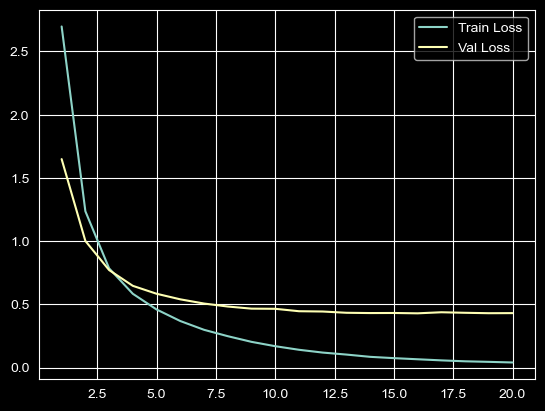

In [21]:
# trying by freezing first two layers
model_pf = get_resnet18_custom(num_classes=37).to(device)
for param in model_pf[0][0].parameters():
    param.requires_grad = False
for param in model_pf[0][4].parameters():
    param.requires_grad = False
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, model_pf.parameters()), lr=0.001, momentum=0.9, nesterov=True)
train_model(model_pf, train_loader, val_loader, optimizer, criterion)

Test Loss: 0.3907
Overall Accuracy: 0.8782
F1 Score (weighted): 0.8782
Accuracy for class 0: 0.9412
Accuracy for class 1: 0.7000
Accuracy for class 2: 0.8261
Accuracy for class 3: 0.8824
Accuracy for class 4: 0.8333
Accuracy for class 5: 0.7619
Accuracy for class 6: 0.9500
Accuracy for class 7: 0.9630
Accuracy for class 8: 0.9444
Accuracy for class 9: 0.7727
Accuracy for class 10: 0.8636
Accuracy for class 11: 0.7500
Accuracy for class 12: 0.8889
Accuracy for class 13: 0.8333
Accuracy for class 14: 0.9412
Accuracy for class 15: 0.9583
Accuracy for class 16: 0.8235
Accuracy for class 17: 1.0000
Accuracy for class 18: 1.0000
Accuracy for class 19: 0.7500
Accuracy for class 20: 0.9474
Accuracy for class 21: 0.8889
Accuracy for class 22: 1.0000
Accuracy for class 23: 0.9130
Accuracy for class 24: 0.9630
Accuracy for class 25: 1.0000
Accuracy for class 26: 0.7667
Accuracy for class 27: 0.7368
Accuracy for class 28: 0.9333
Accuracy for class 29: 1.0000
Accuracy for class 30: 0.9231
Accuracy 

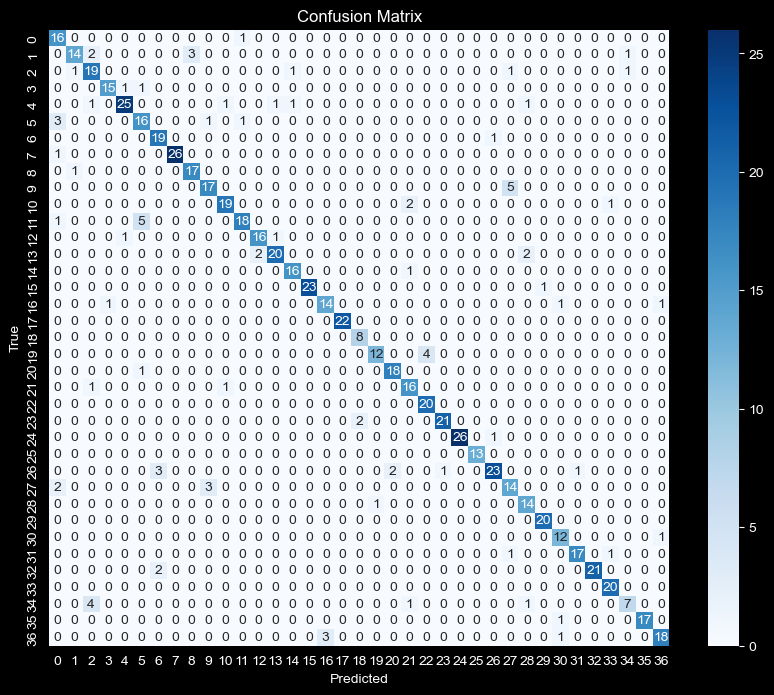

(0.39070131378664213,
 0.878213802435724,
 0.8781608542207232,
 array([[16,  0,  0, ...,  0,  0,  0],
        [ 0, 14,  2, ...,  1,  0,  0],
        [ 0,  1, 19, ...,  1,  0,  0],
        ...,
        [ 0,  0,  4, ...,  7,  0,  0],
        [ 0,  0,  0, ...,  0, 17,  0],
        [ 0,  0,  0, ...,  0,  0, 18]], dtype=int64),
 array([0.94117647, 0.7       , 0.82608696, 0.88235294, 0.83333333,
        0.76190476, 0.95      , 0.96296296, 0.94444444, 0.77272727,
        0.86363636, 0.75      , 0.88888889, 0.83333333, 0.94117647,
        0.95833333, 0.82352941, 1.        , 1.        , 0.75      ,
        0.94736842, 0.88888889, 1.        , 0.91304348, 0.96296296,
        1.        , 0.76666667, 0.73684211, 0.93333333, 1.        ,
        0.92307692, 0.89473684, 0.91304348, 1.        , 0.53846154,
        0.94444444, 0.81818182]))

In [25]:
evaluate_model(model_pf, test_loader, range(37))

In [28]:
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import to_pil_image
def visualise_CAM(model, test_dataset):
    # GradCAM extractor
    cam_extractor = GradCAM(model, target_layer='0.7.1.conv2')
    # DataLoader
    loader = torch.utils.data.DataLoader(test_dataset, batch_size=6, shuffle=True)
    images, labels = next(iter(loader))
    images, labels = images.to(device), labels.to(device)

    for i in range(5):
        img = images[i].unsqueeze(0)
        label = labels[i]

        # Forward pass
        output = model(img)
        pred_class = output.argmax(dim=1).item()

        # Generate CAM
        activation_map = cam_extractor(pred_class, output)

        # Convert image + overlay
        pil_img = to_pil_image(img.squeeze().cpu())
        mask = to_pil_image(activation_map[0].cpu(), mode='F')
        result = overlay_mask(pil_img, mask, alpha=0.15)

        # Convert back to tensor for grid
        result_tensor = torchvision.transforms.ToTensor()(result)

        # Normalize for display
        grid = torchvision.utils.make_grid(result_tensor.unsqueeze(0), nrow=1)
        grid = (grid - grid.min()) / (grid.max() - grid.min())

        # Plot
        plt.subplot(1,2,1)
        plt.imshow(pil_img)
        plt.axis("off")
        plt.title("Original")

        plt.subplot(1,2,2)
        plt.imshow(result)
        plt.axis("off")
        plt.title("GradCAM Overlay")

        plt.show()

        print("Label:", idx_to_class[label.item()])

In [ ]:
print(model_pf)

In [24]:
model_pf = get_resnet18_custom(num_classes=37).to(device)
for param in model_pf[0][0].parameters():
    param.requires_grad = False
for param in model_pf[0][4].parameters():
    param.requires_grad = False
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, model_pf.parameters()), lr=0.001, momentum=0.9, nesterov=True)
checkpoint = torch.load("./models/Epoch16.pth")
model_pf.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
print("Loaded")

Loaded


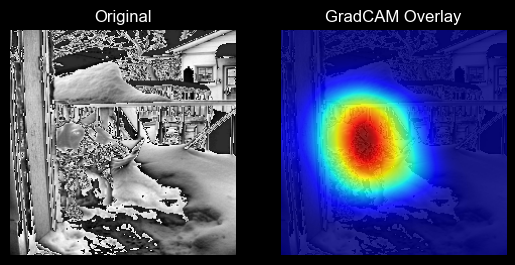

Label: english_setter


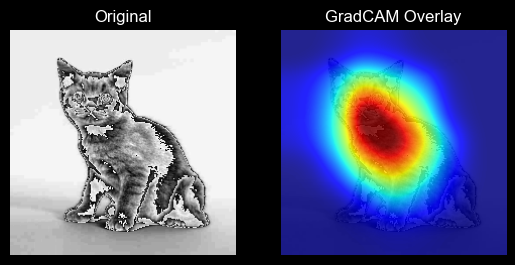

Label: british_shorthair


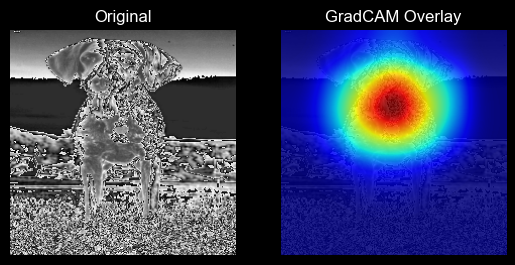

Label: german_shorthaired


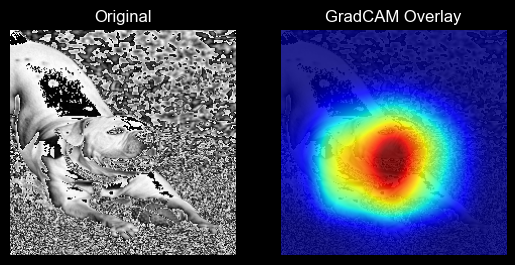

Label: american_bulldog


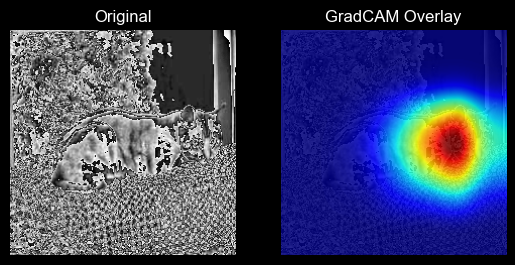

Label: bengal


In [29]:
visualise_CAM(model_pf, test_dataset)

In [53]:
BULLDOG_IDX = 1
PUG_IDX = 25
EPSILON = 0.01


def _get_mean_std_tensors():
    """Return mean/std as (1,C,1,1) tensors on the current device.
    Falls back to ImageNet-like values if `mean`/`std` aren't available in scope.
    """
    try:
        mean_t = torch.tensor(mean, device=device).view(1, -1, 1, 1)
        std_t = torch.tensor(std, device=device).view(1, -1, 1, 1)
    except Exception:
        mean_t = torch.tensor([0.485, 0.456, 0.406], device=device).view(1, -1, 1, 1)
        std_t = torch.tensor([0.229, 0.224, 0.225], device=device).view(1, -1, 1, 1)
    return mean_t, std_t


def targeted_fgsm_attack(image, epsilon, target_label, model):
    """Targeted FGSM that correctly handles normalized inputs.

    - `image` should be the normalized tensor the model expects (1,C,H,W).
    - `epsilon` is in PIXEL space (0..1). Internally it's converted to the
      corresponding value in normalized space using the dataset `std`.
    - Returns the *normalized* perturbed image (detached, same device/dtype).
    """
    # Clone and ensure grad on the normalized tensor
    img = image.detach().clone().to(device)
    img.requires_grad = True

    model.eval()

    # Forward + targeted loss
    output = model(img)
    target = torch.tensor([target_label], dtype=torch.long, device=device)
    loss = torch.nn.functional.cross_entropy(output, target)

    # Backprop to get gradients w.r.t. the input
    if img.grad is not None:
        img.grad.zero_()
    model.zero_grad()
    loss.backward()

    if img.grad is None:
        # No gradient available -> return original image unchanged
        return image.detach()

    # Convert epsilon from pixel-space to normalized-space per-channel
    mean_t, std_t = _get_mean_std_tensors()
    eps_norm = (torch.tensor(epsilon, device=device) / std_t).to(device)

    # Targeted FGSM: move in the NEGATIVE direction of the gradient
    perturbed = img - eps_norm * img.grad.data.sign()

    # Clip in normalized space to keep pixels within [0,1]
    min_norm = (0.0 - mean_t) / std_t
    max_norm = (1.0 - mean_t) / std_t
    perturbed = torch.max(torch.min(perturbed, max_norm), min_norm)

    return perturbed.detach()


def evaluate_attack_success(model, test_loader, epsilon=EPSILON, debug=False):
    """Evaluate targeted FGSM success (BULLDOG -> PUG).

    - `epsilon` is interpreted in pixel-space (0..1).
    - If `debug=True` a few before/after examples are shown.
    """
    # Ensure model params don't require grad (we only need input gradients)
    for param in model.parameters():
        param.requires_grad = False
    model.eval()

    correct_bulldogs = 0
    fooled_to_pug = 0

    if debug:
        examples = []

    print(f"Starting targeted attack (Bulldog -> Pug) with epsilon={epsilon:.4f} (pixel-space)")

    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Filter for American Bulldogs
        mask = (labels == BULLDOG_IDX)
        if not mask.any():
            continue

        bulldog_imgs = images[mask]

        for i in range(bulldog_imgs.size(0)):
            single_img = bulldog_imgs[i].unsqueeze(0)

            # STEP 1: original prediction
            with torch.no_grad():
                initial_pred = model(single_img).argmax(dim=1).item()

            if initial_pred != BULLDOG_IDX:
                # skip misclassified bulldogs
                continue

            correct_bulldogs += 1

            # STEP 2: targeted attack (returns normalized tensor)
            adv_img = targeted_fgsm_attack(single_img, epsilon, PUG_IDX, model)

            # STEP 3: final prediction
            with torch.no_grad():
                final_pred = model(adv_img).argmax(dim=1).item()

            if final_pred == PUG_IDX:
                fooled_to_pug += 1

            if debug and len(examples) < 3:
                examples.append((single_img.cpu(), adv_img.cpu(), initial_pred, final_pred))

    if correct_bulldogs == 0:
        print("No correctly classified Bulldog examples were found in the test set.")
        return 0.0

    sr = (fooled_to_pug / correct_bulldogs) * 100.0
    print(f"Bulldogs correctly classified: {correct_bulldogs}")
    print(f"Successfully flipped to Pug:   {fooled_to_pug}")
    print(f"Attack Success Rate:           {sr:.2f}%")

    if debug and len(examples) > 0:
        import torchvision
        import matplotlib.pyplot as plt
        mean_t, std_t = _get_mean_std_tensors()
        for orig, adv, ipred, fpred in examples:
            # denormalize for display
            orig_denorm = orig * std_t.cpu() + mean_t.cpu()
            adv_denorm = adv * std_t.cpu() + mean_t.cpu()
            grid = torchvision.utils.make_grid(torch.cat([orig_denorm, adv_denorm], dim=0), nrow=2)
            plt.figure(figsize=(6,3))
            plt.imshow(grid.permute(1,2,0).clamp(0,1).numpy())
            plt.axis('off')
            plt.title(f"init:{ipred} -> adv:{fpred}")
            plt.show()

    return sr


--- Testing epsilon = 0.001
Starting targeted attack (Bulldog -> Pug) with epsilon=0.0010 (pixel-space)
Bulldogs correctly classified: 14
Successfully flipped to Pug:   5
Attack Success Rate:           35.71%
Result: epsilon=0.0010 | attack success = 35.71%

--- Testing epsilon = 0.005
Starting targeted attack (Bulldog -> Pug) with epsilon=0.0050 (pixel-space)
Bulldogs correctly classified: 14
Successfully flipped to Pug:   5
Attack Success Rate:           35.71%
Result: epsilon=0.0050 | attack success = 35.71%

--- Testing epsilon = 0.01
Starting targeted attack (Bulldog -> Pug) with epsilon=0.0100 (pixel-space)
Bulldogs correctly classified: 14
Successfully flipped to Pug:   0
Attack Success Rate:           0.00%
Result: epsilon=0.0100 | attack success = 0.00%

--- Testing epsilon = 0.02
Starting targeted attack (Bulldog -> Pug) with epsilon=0.0200 (pixel-space)
Bulldogs correctly classified: 14
Successfully flipped to Pug:   0
Attack Success Rate:           0.00%


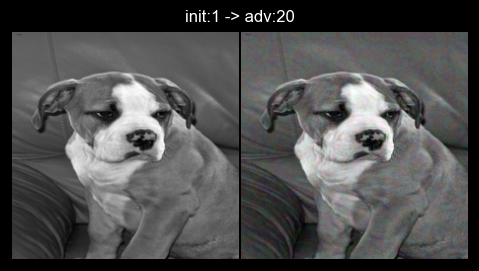

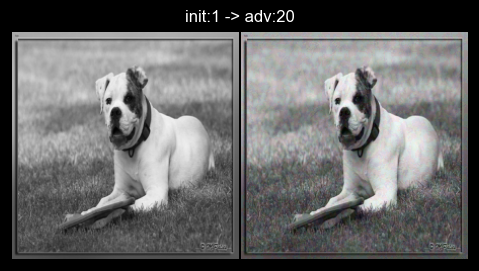

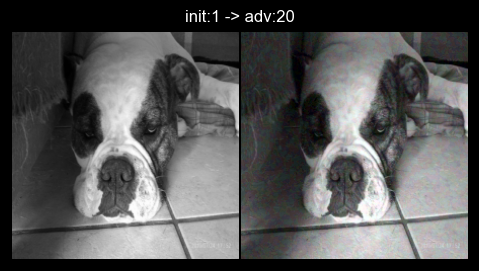

Result: epsilon=0.0200 | attack success = 0.00%


In [54]:
# Quick verification: run attacks with a few epsilons and show examples for the largest eps
eps_values = [0.001, 0.005, 0.01, 0.02]
for eps in eps_values:
    print("\n--- Testing epsilon =", eps)
    sr = evaluate_attack_success(model_pf, test_loader, epsilon=eps, debug=(eps == eps_values[-1]))
    print(f"Result: epsilon={eps:.4f} | attack success = {sr:.2f}%")